# Assignment 3
Group 13: Akshaya Muralidharan, Maryna Nemyrovska, Claas Brüß, Gildas Igor Koumene Taffo, Bowen Li

In [0]:
import numpy as np

In [0]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [0]:
import imageio
def sample_images(N, fname_low=1, fname_high=5000, digits=[1,3,8], seed=42):
    np.random.seed(seed)

    X=np.zeros((784,3*N))
    C=np.zeros((3*N,3))
    for i, digit in enumerate(digits):
        val_rgb=np.zeros((3,))
        val_rgb[i]=1.0
        sample = [ ("d"+str(digit)+"_"+str(j).zfill(4)) for j in np.random.randint(fname_low, fname_high, N)]
        for j in range(N):
            X[:,i*N+j]=np.float64(imageio.imread('mnist/d'+str(digit)+'/'+sample[j]+'.png').ravel())
            C[i*N+j]=val_rgb
    return X, C

In [0]:
import matplotlib.pyplot as plt

#reorder indexes for visualization purposes
def plotPCA(S, N, C):
    
    idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
    plt.scatter(S[0,idx_new],S[1,idx_new],c=C[idx_new])
    plt.show()

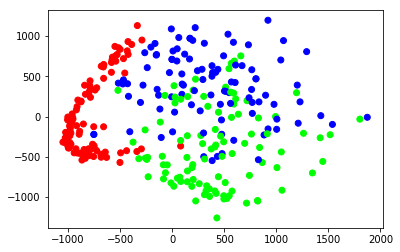

In [0]:
k = 2
N = 100
X, C = sample_images(N)

S = linear_pca(X, k)
plotPCA(S, N, C)

In [0]:
def gram_pca(K,k):
    h = np.identity(K.shape[0]) - ((1.0/K.shape[0])*(np.ones((K.shape[0],K.shape[0]))))
    K_c= np.dot(np.dot(h,K),h)
    [U,Sigma,VT]=np.linalg.svd(K_c,full_matrices=False)
    rtS = np.sqrt(Sigma)    
    S=np.expand_dims(rtS[:k],axis=1)*VT[:k,:]
    return S

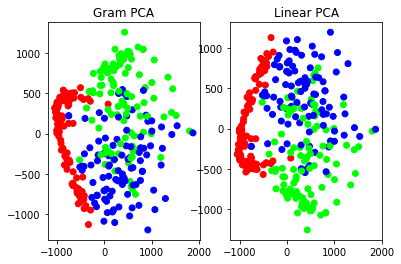

In [0]:
# Insert Code for Subtask 1.3 here

k = 2
N = 100
X, C = sample_images(N)

S = gram_pca(np.dot(X.T, X), k)
plt.subplot(1,2,1)
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(S[0,idx_new],S[1,idx_new],c=C[idx_new])
plt.title('Gram PCA')

S = linear_pca(X, k)
plt.subplot(1,2,2)
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(S[0,idx_new],S[1,idx_new],c=C[idx_new])
plt.title('Linear PCA')

plt.show()

In [0]:
def kern_fun(x1,x2,sigma):
    return np.exp((-(np.linalg.norm(x1-x2)**2))/(2*sigma**2))

In [0]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here

    row,col=X.shape
    K = np.zeros(shape=(row,row))
   
    i=0
    for ci in X:
        j=0
        for cj in X:
            K[i,j] = kern_fun(ci,cj,sigma)
            j=j+1
        i=i+1
    
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

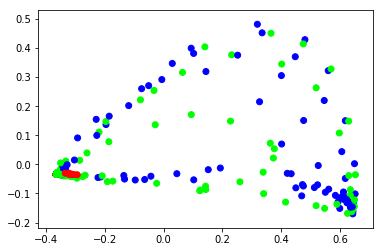

In [0]:
#Insert Code for Subtask 1.5 here
k = 2
N = 100
X, C = sample_images(N)
S = gaussian_kernel_pca(X, k,1000)
plotPCA(S, N, C)